# Statistics


Statistic theory goes the opposite way to probability theory. In reality what we observe is a sample of data, but we don't know via what mechanism the data are generated. Statistics asks how can we infer the data generating process from the sample that we observe. For example, if we assume the sample comes from a normal distribution, what is the best way that we learn the population mean and variance? Do the data provide sufficient evidence that two samples are drawn from populations of the same means? Statistics uses the sample to compute some numbers, while the underlying probability model guides the interpretation of these numbers.

**Example** 

This is a sample of 100 accounts from
[HK top 300 Youtubers](https://www.kaggle.com/datasets/patriotboy112/hks-top-300-youtubers) in the previous lecture.

In [1]:
import pandas as pd

# Reading the CSV file
d1_log_sub = pd.read_csv("logYoutuber_sample.csv")

# Checking the number of rows
n = d1_log_sub.shape[0]
print(n)

100


Point estimates

In [2]:
import numpy as np

print(np.mean(d1_log_sub["count"]))

6.255411898720982


In [3]:
print(np.var(d1_log_sub["count"]))

2.7412359527203556


We are interested in the *sample mean*, as it tells us the location of the center in the probability weighted average, or *population mean* $\mu = E[X_i]$.
We are also interested in the *sample variance*, as it tells us the scale of spread of the sample, or *population variance* $\sigma^2 = var(X_i)$.

In this example, we can view the sample as a multinomial distribution with $n$ outcomes at the observed realized points. 
Since each observation is drawn randomly and independently, everyone is equally important.
Assigning equal probability $1/n$ on each point naturally delivers the sample mean $\hat{\mu} = \bar{X} = n^{-1} \sum_{i=1}^n X_i.$
Similarly, a widely used sample variance is computed as $s^2 = (n-1)^{-1} \sum_{i=1}^n (X_i - \hat{\mu})^2$.

More generally, for $p>0$ the statistic $n^{-1} \sum_{i=1}^n x_i^p$ is called the $p$-th sample moment, and $n^{-1} \sum_{i=1}^n (X_i - \bar{X})^p$ is called the $r$-th centered moment. 

## Estimation methods

Suppose that the data are generated from a parametric model. Statistical
estimation is an "educated guess" of the unknown parameter from the observed data. A
*principle* is an ideology about a proper way of estimation. Over the
history of statistics, only a few principles are widely accepted.
The two most popular methods are the *method of moments* and the *maximum likelihood method*. 



### Method of moments

The method of moments expresses some moments as functions 
of these parameters. 
We use the sample moments to mimic the corresponding population moments. 
Then we invert the functions to back out the parameters. 

**Example**

A normal distribution is completely characterized by $\mu$ and $\sigma^2$. The following two estimates 
are the method of moments estimates of the two parameters. 


In [4]:
x = np.random.normal(size=20)
print(np.mean(x))
print(np.var(x))

-0.39432695294765424
1.3853631863911244



**Example**: 

The $t$ distribution has one parameter, its degree of freedom $\nu$. The variance of $t(\nu)$, if $\nu >2$,  is  $\sigma^2 = \nu / (\nu - 2)$.
From the data, we estimate $\hat{\sigma}^2$, and then solve $\hat{\sigma}^2 = \nu / (\nu - 2)$ to get

$$
  \hat{\nu} = \frac{2\hat{\sigma}^2}{\hat{\sigma}^2 - 1}
$$

Note: The population variance of $t$ distribution is no smaller than 1.






### Maximum likelihood

The maximum likelihood estimation (MLE) looks for the value of the parameter that maximizes the log-likelihood. Because by the concavity of logarithm, the true parameter is the value that maximizes the expected likelihood function. In reality, we maximize its empirical version. 



Consider a random sample 
drawn from a parametric
distribution with density $f\left(x;\theta\right)$, where
$x$ is either a scalar random variable or a random vector. A
parametric distribution is completely characterized by a
finite-dimensional parameter $\theta$. We use the data to estimate $\theta$.

The log-likelihood of observing the entire *random* sample $\mathbf{X}=(X_1,X_2,\ldots,X_n)$ is

$$
  L_{n}\left(\theta;\mathbf{X}\right):=\log\left(\prod_{i=1}^{n}f\left(X_{i};\theta\right)\right)=\sum_{i=1}^{n}\log f\left(X_{i};\theta\right).
$$

In reality the sample $\mathbf{X}$ is given and for each $\theta\in\Theta$ we can
evaluate $L_{n}\left(\theta;X\right)$. The maximum likelihood estimator
is

$$\widehat{\theta}_{MLE}:=\arg\max_{\theta\in\Theta}L_{n}\left(\theta;\mathbf{X}\right).$$

This $\widehat{\theta}_{MLE}$ makes observing $X$ the
“most likely” in the entire parametric space.
A formal justification of MLE uses the terminology the *Kullback-Leibler information criterion*,
which is a measurement of the "distance" or "divergence" between two distributions. This information criterion is maximized at the true parameter value.



**Example**

Consider the Gaussian location model $X_{i}\sim N\left(\mu, \sigma^2 \right)$,
where $\mu$ and $\sigma$ are unknown parameters to be estimated. The likelihood of
observing $X_{i}$ is
$f\left(X_{i};\mu\right)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{1}{2\sigma^2}\left(X_{i}-\mu\right)^{2}\right)$.
The likelihood of observing the sample $\mathbf{X}$ is

$$f\left(\mathbf{X};\mu, \sigma \right)=\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{1}{2\sigma^2}\left(X_{i}-\mu\right)^{2}\right)$$

and the log-likelihood is

$$L_{n}\left(\mu, \sigma;\mathbf{X}\right)=-\frac{n}{2}\log\left(2\pi\right) - n \log \sigma -\frac{1}{2\sigma^2}\sum_{i=1}^{n}\left(X_{i}-\mu\right)^{2}.$$

After some computation, we will find $\hat{\mu}=n^{-1} \sum_{i=1}^n X_i$ and $\hat{\sigma}^2 = n^{-1} \sum_{i=1}^n (X_i - \bar{X})^2$.
Notice the denominator in the estimated variance here is $n$, instead of $(n-1)$ as in $s^2$. While $s^2$ is an unbiased estimator for the variance, the MLE estimator is therefore biased for the variance.

## Statistic Inference

We are interesting in relating the statistic to the population. 
Suppose $X_i$'s randomly drawn from a distribution, and we would like to learn the mean $\mu: = E[X_i]$.
The sample mean is a natural estimator for $\mu$.


Interval estimation quantifies the uncertainty of the estimator. The most familiar formula might be

$$
\left(
\hat{\mu} - \frac{1.96}{\sqrt{n}} \hat{\sigma}, 
\hat{\mu} + \frac{1.96}{\sqrt{n}} \hat{\sigma}
\right).
$$

We will explain the rationale behind this formula.


In [5]:
import numpy as np

def CI(x):
    # x is a numpy array of random variables
    # nominal coverage probability is 95%
    n = len(x)
    mu = np.mean(x)
    sig = np.std(x, ddof=1)  # ddof=1 for sample standard deviation
    upper = mu + 1.96 / np.sqrt(n) * sig
    lower = mu - 1.96 / np.sqrt(n) * sig
    return {'lower': lower, 'upper': upper}

In [6]:
CI(d1_log_sub["count"])

{'lower': np.float64(5.929266178733169),
 'upper': np.float64(6.5815576187087945)}

An interval estimator is constructed according to a *sampling distribution*.
The sampling distribution is the distribution of a statistic. 

**Example**

Sampling distributions. Under normal distribution

* Assume $X_i \sim N(\mu, \sigma^2)$ with a known variance. Then $\bar{X} \sim N(\mu, \sigma^2 / n)$.
* Assume $X_i \sim N(\mu, \sigma^2)$ with a unknown variance. Then $\frac{\bar{X} - \mu}{s} \sim t(n-1)$.
* Assume $X_i \sim (\mu, \sigma^2)$ with a finite variance. 
$\sqrt{n} \frac{\bar{X} - \mu}{\sigma} \stackrel{d}{\rightarrow} N(0, 1)$. (to be discussed in asymptotic theory)

**Simulation example**

In a simulation, we compute the empirical coverage probability of the formula of the confidence interval.

In [7]:
from scipy.stats import poisson

def CI(x):
    n = len(x)
    mu = np.mean(x)
    sig = np.std(x, ddof=1)  # Sample standard deviation
    upper = mu + 1.96 / np.sqrt(n) * sig
    lower = mu - 1.96 / np.sqrt(n) * sig
    return {'lower': lower, 'upper': upper}

Rep = 1000
sample_size = 10
capture = np.zeros(Rep)
Bounds = np.zeros((Rep, 2))
mu = 2

for i in range(Rep):
    x = poisson.rvs(mu, size=sample_size)
    bounds = CI(x)
    capture[i] = ((bounds['lower'] <= mu) & (mu <= bounds['upper']))
    Bounds[i,] = [bounds['lower'], bounds['upper']]

print("The empirical coverage probability =", np.mean(capture))

The empirical coverage probability = 0.905


*Coverage probability* is the probability that the confidence interval captures the true value in repeated sampling.
Here the confidence interval is random while the true value is fixed.

**Simulation example**

Witness the confidence intervals from 25 replications.

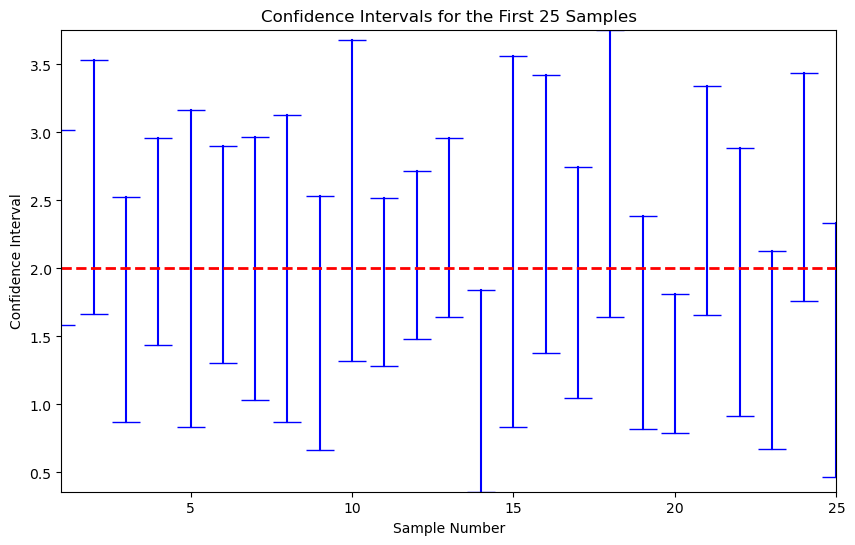

In [8]:
import matplotlib.pyplot as plt

# Assuming Bounds is a numpy array with shape (Rep, 2) and contains the confidence intervals
Bounds25 = Bounds[:25, :]  # Extract the first 25 confidence intervals

plt.figure(figsize=(10, 6))
for i, (lower, upper) in enumerate(Bounds25, start=1):
    plt.plot([i, i], [lower, upper], marker='_', markersize=20, color='blue')  # Plot each confidence interval
plt.hlines(y=2, xmin=1, xmax=25, colors='red', linestyles='dashed', linewidth=2)  # True mean line

plt.xlim(1, 25)
plt.ylim(Bounds25.min(), Bounds25.max())
plt.xlabel('Sample Number')
plt.ylabel('Confidence Interval')
plt.title('Confidence Intervals for the First 25 Samples')
plt.show()

It is important to understand that the coverage probability is not the probability that the parameter falls into a fixed interval, which is the interpretation of the *Bayesian credit interval*. 
The latter requires different way for construction.

### Hypothesis Testing


A *hypothesis* is a statement about the parameter space $\Theta$.
Hypothesis testing checks whether the data support a *null hypothesis*
$\Theta_{0}$, which is a subset of $\Theta$ of interest. Ideally the
null hypothesis should be suggested by scientific theory. The
*alternative hypothesis* $\Theta_{1}=\Theta\backslash\Theta_{0}$ is the
complement of $\Theta_{0}$. Based on the observed evidence, hypothesis
testing decides to accept or reject the null hypothesis. If the null
hypothesis is rejected by the data, it implies that from the statistical
perspective the data are incompatible with the proposed scientific
theory.





Let $\phi(\mathbf{X};\theta)$ be the *decision function*. It takes value "1" when $\theta$ is rejected as a null hypothesis, and it takes value "0" otherwise.
We define the power function $\beta(\theta) = E[ \phi(\mathbf{X};\theta) ]$, which is the probability of rejecting a null hypothesis $\theta$.

Actions, States and Consequences:

------------------------------------------------------------------------
                    |   accept $H_{0}$  |   reject $H_{0}$
      $H_{0}$ true  |  correct decision |    Type I error
      $H_{0}$ false |   Type II error   |  correct decision
------------------------------------------------------------------------

-   The *probability of committing Type I error* is
    $\beta\left(\theta\right)$ for some $\theta\in\Theta_{0}$.

-   The *probability of committing Type II error* is
    $1-\beta\left(\theta\right)$ for some $\theta\in\Theta_{1}$.



The philosophy on hypothesis testing has been debated for a long time. At
present the prevailing framework in statistics textbooks is the
*frequentist perspective*. Frequentist views the parameter as fixed. They keep a conservative attitude about the Type I error: Only
if overwhelming evidence is revealed shall a researcher reject the
null. Under the principle of protecting the null hypothesis, a desirable
test should have a small level. Conventionally we take $\alpha=0.01,$
$0.05$ or $0.1$. We say a test is *unbiased* if

$$\inf_{\theta\in\Theta_{1}}\beta\left(\theta\right)>\sup_{\theta\in\Theta_{0}}\beta\left(\theta\right).$$

There can be many tests of correct size.


**Remark**

Let $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.
A trivial test function
$\phi(\mathbf{x})=1\left\{ 0\leq U\leq\alpha\right\}$ for all
$\theta\in\Theta$, where $U$ is a random variable from a uniform
distribution on $\left[0,1\right]$, has the correct size $\alpha$ but no
non-trivial power at the alternative. On the other extreme, the trivial
test function $\phi(\mathbf{x})=1$ for all $\mathbf{x}$
enjoys the biggest power but suffers incorrect size.



Usually, we design a test by proposing a test statistic
$T_{n}$ and a corresponding critical value
$c_{1-\alpha}$. Given $T_{n}$ and $c_{1-\alpha}$, we write the test
function as

$$
\phi(\mathbf{X})=1\left\{ T_{n} (\mathbf{X})>c_{1-\alpha}\right\}.
$$

To ensure such a $\phi(\mathbf{x})$ has the correct size, we need
to figure out the distribution of $T_{n}$ under the null hypothesis
(called the *null distribution*), and choose a critical value
$c_{1-\alpha}$ according to the null distribution where $\alpha$
is the desirable size or level.



Another commonly popular indicator for the compatibility between the data and the null hypothesis is the $p$-value:

$$\sup_{\theta\in\Theta_{0}}P_{\theta}\left\{ T_{n}\left({\mathbf{x}}\right)\leq T_{n}\left(\mathbf{X}\right)\right\}.$$

In the above expression, $T_{n}\left(\mathbf{x}\right)$ is the realized
value of the test statistic $T_{n}$, while
$T_{n}\left(\mathbf{X}\right)$ is the random variable generated by
$\mathbf{X}$ under the null $\theta\in\Theta_{0}$. The interpretation of
the $p$-value is tricky. $p$-value is the probability, when the null hypothesis is true,
that we observe
$T_{n}(\mathbf{X})$ being greater than the realized $T_{n}(\mathbf{x})$.

The $p$-value is *not* the probability that the null hypothesis is true.
Under the frequentist perspective, the null hypothesis is either true or
false, with certainty. The randomness of a test comes only from
sampling, not from the hypothesis at all.

### Connections

Given the same sample and the underlying approach,
hypothesis testing, confidence interval, and $p$-value are tightly connected. The followings are equivalent: 

* The hypothesized value is rejected by a test of size $\alpha$;
* The hypothesized value is excluded by the confidence interval of coverage probability $(1-\alpha)$;
* Its $p$-value under the hypothesized value is smaller than $\alpha$.

On the opposite side of the coin, the followings are the equivalent as well:

* The hypothesized value is not rejected by a test of size $\alpha$;
* The hypothesized value is included by the confidence interval of coverage probability $(1-\alpha)$;
* Its $p$-value under the hypothesized value is large than $\alpha$.

The one-to-one mapping between the points in the confidence interval and the outcome of the test allows constructing the 
confidence interval by inverting the  test. In words, if we collect all points that are not rejected by the test of size $\alpha$, we obtain the confidence interval of coverage probability $(1-\alpha)$.

### Revealing the population

As in the previous lecture, we view the HK top 300 Youtubers as the population. 

In [9]:
d1_log = pd.read_csv("logYoutuber.csv")

# Number of rows
N = d1_log.shape[0]


In [10]:
print( np.mean(d1_log["count"]) )

print( np.var(d1_log["count"]) )

np.corrcoef(d1_log["count"], d1_log["view"])[0, 1]

6.146389135729357
2.6415986858999068


np.float64(0.6086587545357833)

### Random Sampling

Each sample is random. It means that $\hat{\mu}$ is a random variable across the potential samples. In this population the total number of 
outcomes is $N=300$. For a sample of size $n=100$, there are at most 

$$
\binom {N} {n} = \binom {300} {100} = 4.15\times 10^{81}
$$

possibilities for the sample mean. This is a number as large as all the atoms in the universe.

In [11]:
import numpy as np
import pandas as pd

# Assuming d1.log is a pandas DataFrame and 'count' is a column in that DataFrame
d1_log = pd.DataFrame({'count': np.random.randint(1, 100, size=1000)})  # Example data
N = len(d1_log['count'])
n = 50  # Example subsample size

def subsample_mean():
    indices = np.random.choice(range(N), n, replace=False)
    return d1_log['count'].iloc[indices].mean()

rep_means = np.array([subsample_mean() for _ in range(200)])

print(rep_means)

[53.46 51.1  44.66 54.4  48.86 55.48 56.48 58.18 50.08 46.88 51.8  46.32
 47.   43.42 52.26 47.08 48.32 54.32 45.6  52.46 49.84 50.82 51.64 55.18
 58.48 47.64 53.62 48.52 52.72 46.24 44.84 47.08 49.72 41.46 52.42 50.76
 51.94 51.4  49.44 52.28 44.62 53.6  43.66 45.34 54.46 42.4  50.14 54.28
 52.38 51.62 51.46 46.72 49.24 43.74 54.26 47.76 49.92 46.66 48.64 39.72
 53.72 46.98 44.7  47.36 42.54 48.04 40.56 46.32 57.74 53.1  44.32 42.7
 45.08 52.12 45.3  48.86 52.54 53.14 51.86 43.04 50.86 52.22 51.7  52.76
 46.26 47.74 50.46 48.84 46.48 51.22 51.74 47.06 56.12 46.08 47.08 44.76
 45.62 53.18 55.44 46.74 57.34 46.88 48.5  54.56 50.14 54.88 50.68 50.96
 52.12 48.38 47.94 45.28 50.38 49.14 52.96 47.7  48.18 53.06 51.14 43.54
 54.56 50.82 47.28 51.8  50.8  42.58 50.2  50.72 52.08 46.52 45.94 45.92
 48.02 53.58 48.84 50.64 50.34 50.94 53.42 49.98 51.04 40.28 53.4  53.26
 48.5  56.88 52.22 46.24 48.24 48.68 54.9  49.78 46.68 56.18 56.46 45.82
 51.48 51.9  50.08 57.88 50.5  55.   46.7  49.56 51.

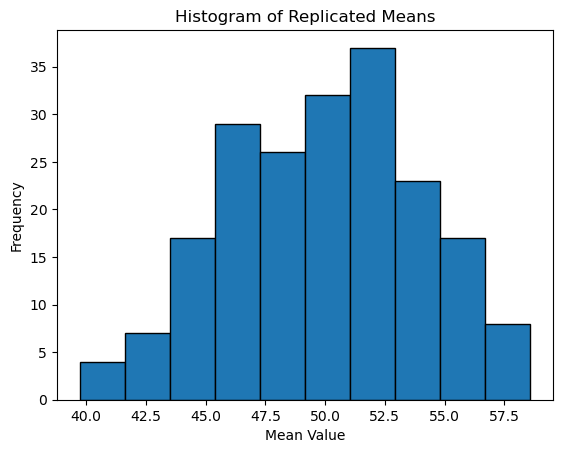

In [12]:
import matplotlib.pyplot as plt

# Assuming rep.mean is a numpy array or a list of means
plt.hist(rep_means, bins=10, edgecolor='black')
plt.title('Histogram of Replicated Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show()

## Multivariate Variables

For a bivariate random vector $(X_i,Y_i)$,  

* Covariance 

$$
\hat{\sigma}_{XY} = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X}) (Y_i - \bar{Y}) = \frac{1}{n} \sum_{i=1}^n X_i Y_i - \bar{X} \bar{Y}.
$$

* Correlation coefficient 

$$
\hat{\rho}_{XY} = \frac{\hat{\sigma}_{XY}} { \sqrt{ \hat {\sigma}^2_{X} \hat {\sigma}^2_{Y} }}
$$

In [13]:
np.corrcoef(d1_log_sub["count"], d1_log_sub["view"])[0, 1]

np.float64(0.6420669756845753)


## Regressions

In machine learning terminologies, all examples we have talked so far are *unsupervised learning*, which extracts some features from  observed data. 
Another category is called *supervised learning*, which is to use a few *independent variables* (regressors) to fit a *dependent variables*. The linear regression is a simple example of such a statistical exercise. 


Regression carries out a very simple task. It minimizes the the sum of squared residuals $\sum_{i=1}^n (y_i - \hat{y}_i)^2$. 
In other words, it combines the vector $\mathbf{x}$ into $\beta' \mathbf{x}$ to reduce the variation of $(\mathbf{y}-\mathbf{x}'\beta)$ as much as possible. For any sample $(x_i,y_i)_{i=1}^n$, such an algorithm can be implemented. It has nothing to do with causality.

In reality, $(x_i, y_i)$ are observed numbers that the data analyst can only take as given. 
The *ordinary least squares* is a simple linear algebraic operation.

Now we superimpose uncertainty on it. If $X$ is fixed whereas $Y$ is uncertain, we have the conditional model (discriminative model). 
It is useful for predicting the average outcome of $y$ given an $x$, although not very informative if we are interested in  extrapolating out of the support of the observed $X$. 





If both $(X,Y)$ are uncertain, we have the unconditional model (generative model). The unconditional model can be thought as if it is generated via two steps: 
First we draw $X$, and then draw $Y|X$. We know $P(X,Y) = P(Y|X)P(X)$. 

The difference between the conditional model and the unconditional model is more about conceptional difference. They are the same in terms of the linear algebra in the estimation. (Slight difference exits in time series contexts where initial conditions matter in small sample.)



Let us use the simple regression and elementary algebra to derive the regression coefficient. If both $(X,Y)$ have unit variance, then the regression coefficient is the correlation coefficient. More generally, the regression coefficient is proportional to the correlation coefficient:

$$\beta = \frac{\sigma_{xy}}{\sigma_x^2}=\frac{\rho \sigma_x \sigma_y}{\sigma_x^2} = \rho \frac{\sigma_y} {\sigma_x}.$$

Given a sample, we use the observed data to compute $\hat{\sigma}_{xy}$ and $\hat{\sigma}_x^2$, and thereby $\hat{\beta}$ as their ratio.



## Remarks

The beauty of statistics lies in their deep connection with philosophy. A realized sample is a set of given numbers. They are fixed, known, and invariant. But where is uncertainty? Bayesians argue that uncertainty comes from people's belief about the object of interest. The data contain information to help refine or update our beliefs. In contrast, frequentists contend that uncertainty is present  before the numbers, or realizations, are revealed; once the realizations are revealed, uncertainty is gone. 

The two schools of philosophical thoughts, Bayesian and frequentist, have been contesting over centuries. Either has pros and cons. Nowadays in academic research and in teaching, frequentist remains the mainstream so it is the one that we are more familiar with. However, frequentist interpretation of probability and the resulting implication for statistical inference are not completely natural. Repeated experiments are more easily perceived in physics and other natural science, but may be unrealistic in many economic settings. On the other hand, Bayesian encounters difficulty in reaching a consensus about prior distributions. 